# Baseball DAND Project:

#### The Baseball Data Analysis project is done as part of the nano degree requirements at Udacity. This project is connected with the Introduction to Data Analysis course. This project covers all the steps invloved  in the Data Analysis Proccess. I have chosen the Baseball Data Set which is provided by Sean Lahman. This data set contains complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more.

I have identified different questions that can be answered using the Base ball data set. For each question, I will expalin how the different steps of Data Analysis are covered. 

### Question 1: From 2005-2016 in both the leagues list the player name who has ranked 1st in each of the batting metrics. 

I have framed the above question after acquring the data from http://www.baseball1.com website. I have gone through the data set and started off with this basic question. To answer this question we would mainly need the Batting.csv data set. As the data set conatins all the data from 1871 to 2016, we have to clean the data. 

In [1]:
# importing the necessary functions:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning the batting data set in such a way that it contains records only from 2005:

In [2]:
batting_df = pd.read_csv('Batting.csv')
batting_df_clean = batting_df[batting_df['yearID']>=2005]
# lets cross check the cleaned data
print batting_df_clean.head()

        playerID  yearID  stint teamID lgID    G   AB    R    H  2B  ...   \
85985  abernbr01    2005      1    MIN   AL   24   67    5   16   1  ...    
85986  abreubo01    2005      1    PHI   NL  162  588  104  168  37  ...    
85987  accarje01    2005      1    SFN   NL   28    2    0    1   0  ...    
85988  acevejo01    2005      1    COL   NL   36    8    0    1   0  ...    
85989  adamsmi03    2005      1    MIL   NL   13    0    0    0   0  ...    

         RBI    SB   CS   BB     SO   IBB  HBP   SH   SF  GIDP  
85985    6.0   2.0  0.0    7    9.0   0.0  1.0  3.0  1.0   2.0  
85986  102.0  31.0  9.0  117  134.0  15.0  6.0  0.0  8.0   7.0  
85987    0.0   0.0  0.0    0    0.0   0.0  0.0  0.0  0.0   0.0  
85988    0.0   0.0  0.0    1    6.0   0.0  1.0  1.0  0.0   0.0  
85989    0.0   0.0  0.0    0    0.0   0.0  0.0  0.0  0.0   0.0  

[5 rows x 22 columns]


### As we are trying to find the name of the player who ranks first in each of the batting metrics we have to link the player Id and his name. This can be done by using merge on batting_df_clean data set and master_df data set.

In [3]:
# add_names() function takes in the batting and master tables and adds the corresponding player names to the batting csv
master_df  = pd.read_csv('Master.csv')

def add_names(batting,master_df):
    return batting.merge(master_df[['playerID','nameFirst','nameLast']],on = 'playerID',how = 'inner')

batting_df_clean = add_names(batting_df_clean,master_df)

# lets see if the names are merged to batting_df_clean
print batting_df_clean.head()

    playerID  yearID  stint teamID lgID    G   AB    R    H  2B    ...      \
0  abernbr01    2005      1    MIN   AL   24   67    5   16   1    ...       
1  abreubo01    2005      1    PHI   NL  162  588  104  168  37    ...       
2  abreubo01    2006      1    PHI   NL   98  339   61   94  25    ...       
3  abreubo01    2006      2    NYA   AL   58  209   37   69  16    ...       
4  abreubo01    2007      1    NYA   AL  158  605  123  171  40    ...       

    CS   BB     SO   IBB  HBP   SH   SF  GIDP  nameFirst   nameLast  
0  0.0    7    9.0   0.0  1.0  3.0  1.0   2.0      Brent  Abernathy  
1  9.0  117  134.0  15.0  6.0  0.0  8.0   7.0      Bobby      Abreu  
2  4.0   91   86.0   5.0  2.0  0.0  6.0   8.0      Bobby      Abreu  
3  2.0   33   52.0   1.0  1.0  2.0  3.0   5.0      Bobby      Abreu  
4  8.0   84  115.0   0.0  3.0  0.0  7.0  11.0      Bobby      Abreu  

[5 rows x 24 columns]


In [4]:
# lets check if any of the values in the batting_df_clean data set are having null values
print batting_df_clean.isnull().values.any()

False


Yay!! No null values :)

In [5]:
#Lets check the data type of each column
print batting_df_clean.dtypes

playerID      object
yearID         int64
stint          int64
teamID        object
lgID          object
G              int64
AB             int64
R              int64
H              int64
2B             int64
3B             int64
HR             int64
RBI          float64
SB           float64
CS           float64
BB             int64
SO           float64
IBB          float64
HBP          float64
SH           float64
SF           float64
GIDP         float64
nameFirst     object
nameLast      object
dtype: object


### Generic function to find the best player in each of the batting metric

In [6]:
def find_best(grp,metric):
    top = grp.sum()[metric].max()
    for key,values in grp:
        if grp.get_group(key).sum()[metric] == top:
            index = values.index.tolist()
            return values.loc[index[0]]['nameFirst']+" "+values.loc[index[0]]['nameLast']

In [7]:
grp = batting_df_clean.groupby(['playerID'],as_index=False)
print  (find_best(grp,'G') + " played most number of GAMES between 2005-2016")
print 
print (find_best(grp,'R')+ " has most number of RUNS betweeen 2005-2016")
print
print (find_best(grp,'H')+ " has most number of HITS during 2005-2016")
print
print (find_best(grp,'2B')+" has most number of DOUBLES during 2005-2016")

Ichiro Suzuki played most number of GAMES between 2005-2016

Miguel Cabrera has most number of RUNS betweeen 2005-2016

Miguel Cabrera has most number of HITS during 2005-2016

Robinson Cano has most number of DOUBLES during 2005-2016


In [8]:
print
print (find_best(grp,'3B')+" has most number of TRIPLES during 2005-2016")
print
print (find_best(grp,'HR')+" has most number of HOME_RUNS during 2005-2016")
print
print (find_best(grp,'RBI')+" has most number of RUNS_BATTED_IN during 2005-2016")
print
print (find_best(grp,'SB')+" has most number of STOLEN_BASES during 2005-2016")


Jose Reyes has most number of TRIPLES during 2005-2016

Albert Pujols has most number of HOME_RUNS during 2005-2016

Miguel Cabrera has most number of RUNS_BATTED_IN during 2005-2016

Jose Reyes has most number of STOLEN_BASES during 2005-2016


In [9]:
print
print (find_best(grp,'CS')+" has most number of CAUGHT_STEALING during 2005-2016")
print
print (find_best(grp,'BB')+" has most number of BASE_ON_BALLS during 2005-2016")
print
print (find_best(grp,'SO')+" has most number of STRIKE_OUTS during 2005-2016")
print
print (find_best(grp,'IBB')+" has most number of INTENTIONAL_WALKS during 2005-2016")


Juan Pierre has most number of CAUGHT_STEALING during 2005-2016

David Ortiz has most number of BASE_ON_BALLS during 2005-2016

Ryan Howard has most number of STRIKE_OUTS during 2005-2016

Albert Pujols has most number of INTENTIONAL_WALKS during 2005-2016


In [10]:
print
print (find_best(grp,'HBP')+" has most number of HIT_BY_PITCH during 2005-2016")
print
print (find_best(grp,'SH')+" has most number of SACRIFICE_HITS during 2005-2016")
print
print (find_best(grp,'SF')+" has most number of SACRIFICE_FLIES during 2005-2016")
print
print (find_best(grp,'GIDP')+" has most number of GROUNDED_INTO_DOUBLE_PLAYS during 2005-2016")


Chase Utley has most number of HIT_BY_PITCH during 2005-2016

Juan Pierre has most number of SACRIFICE_HITS during 2005-2016

Albert Pujols has most number of SACRIFICE_FLIES during 2005-2016

Albert Pujols has most number of GROUNDED_INTO_DOUBLE_PLAYS during 2005-2016


### Conclusion: With just one groupby, one merge and one function, pandas made my life easier in finding out the number one batsmen in each of the batting metrics. This similar analysis can be done on pitching, fielding or any other data set to get the number one player in each of the metric.

### Question 2:

### Finding how the salary of the pitcher and his performance vary. To avoid the conflict of money value and also the effect of old rules I have decided to consider the data from 2005.

In [11]:
pitching_df = pd.read_csv('Pitching.csv')
#cleaning the data
pitching_df_clean = pitching_df[pitching_df['yearID']>=2005]
# displaying the cleansed data
print pitching_df_clean.head()

        playerID  yearID  stint teamID lgID  W  L   G  GS  CG  ...   IBB   WP  \
36244  accarje01    2005      1    SFN   NL  1  5  28   0   0  ...   1.0  1.0   
36245  acevejo01    2005      1    COL   NL  2  4  36   5   0  ...   3.0  0.0   
36246  adamsmi03    2005      1    MIL   NL  0  1  13   0   0  ...   1.0  1.0   
36247  adamste01    2005      1    PHI   NL  0  2  16   0   0  ...   2.0  0.0   
36248  adkinjo01    2005      1    CHA   AL  0  1   5   0   0  ...   2.0  0.0   

       HBP  BK    BFP   GF   R   SH   SF  GIDP  
36244  1.0   0  124.0  7.0  13  1.0  1.0   3.0  
36245  1.0   1  292.0  7.0  48  2.0  5.0   3.0  
36246  0.0   0   61.0  7.0   4  0.0  0.0   1.0  
36247  4.0   0   77.0  5.0  19  1.0  0.0   2.0  
36248  1.0   0   42.0  4.0   8  0.0  0.0   1.0  

[5 rows x 30 columns]


In [12]:
print pitching_df_clean.isnull().values.any()

True


There are null values in the cleansed data. Let us identify what all the attributes that have null values.

In [13]:
print pitching_df_clean.isnull().any()

playerID    False
yearID      False
stint       False
teamID      False
lgID        False
W           False
L           False
G           False
GS          False
CG          False
SHO         False
SV          False
IPouts      False
H           False
ER          False
HR          False
BB          False
SO          False
BAOpp        True
ERA          True
IBB         False
WP          False
HBP         False
BK          False
BFP         False
GF          False
R           False
SH          False
SF          False
GIDP         True
dtype: bool


BOAPP, ERA and GIDP attributes are having null values. Let us try to replace the null values with the corresponding attributes mean value.

In [49]:
BAOpp_mean = pitching_df_clean.BAOpp.mean()
ERA_mean = pitching_df_clean.ERA.mean()
GIDP_mean = pitching_df_clean.GIDP.mean()
pitching_df_clean.BAOpp = pitching_df_clean.BAOpp.fillna(BAOpp_mean)
pitching_df_clean.ERA = pitching_df_clean.ERA.fillna(ERA_mean)
pitching_df_clean.GIDP = pitching_df_clean.GIDP.fillna(GIDP_mean)

In [15]:
print pitching_df_clean.isnull().any()

playerID    False
yearID      False
stint       False
teamID      False
lgID        False
W           False
L           False
G           False
GS          False
CG          False
SHO         False
SV          False
IPouts      False
H           False
ER          False
HR          False
BB          False
SO          False
BAOpp       False
ERA         False
IBB         False
WP          False
HBP         False
BK          False
BFP         False
GF          False
R           False
SH          False
SF          False
GIDP        False
dtype: bool


All the null values are replaced with the mean!

### We need the salary of each player to do the correlation anlaysis. We have to perform merge operation on cleansed pitching data frame and the salary table. We just need the salary column from the salaries.csv dataset.

In [16]:
salary_df = pd.read_csv('Salaries.csv')

In [17]:
pitching_df_clean = pitching_df_clean.merge(salary_df[['playerID','yearID','salary']],on = 
                                            ['playerID','yearID'],how = 'inner')

In [18]:
pitching_df_clean.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,adamsmi03,2005,1,MIL,NL,0,1,13,0,0,...,1.0,0.0,0,61.0,7.0,4,0.0,0.0,1.0,331000
1,adamste01,2005,1,PHI,NL,0,2,16,0,0,...,0.0,4.0,0,77.0,5.0,19,1.0,0.0,2.0,500000
2,affelje01,2005,1,KCA,AL,0,2,49,0,0,...,5.0,0.0,0,232.0,13.0,35,0.0,1.0,6.0,950000
3,alfonan01,2005,1,FLO,NL,1,1,33,0,0,...,1.0,2.0,0,118.0,1.0,15,3.0,2.0,6.0,300000
4,almanca01,2005,1,TEX,AL,0,0,6,0,0,...,4.0,1.0,0,33.0,2.0,8,0.0,2.0,0.0,1100000


In [19]:
# The salary of each player in that corresponding year is merged to pitching_clean_df dataframe

In [20]:
# Function which returns the correlation of two different variables
def correlation(x, y):
    std_x = x.std(ddof=0)
    std_y = y.std(ddof=0)
    x = (x-x.mean())/std_x
    y = (y-y.mean())/std_y
    l = x * y
    return l.mean()

In [21]:
print correlation(pitching_df_clean['ERA'],pitching_df_clean['salary'])

-0.0798689296191


### The Pearsons coefficent says that the pitchers salary and the Earned Run Average are not correlated strongly. Since it is close to zero we cant say that ERA varies with salary proportionally. Let us try to conclude the same thing using a plot. Using the functions of seaborn, I would like to visualize a linear relationship between ERA and salary. Seaborn provides two differnet functions, regplot()  and lmplot(). Both the functions try to draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression. 

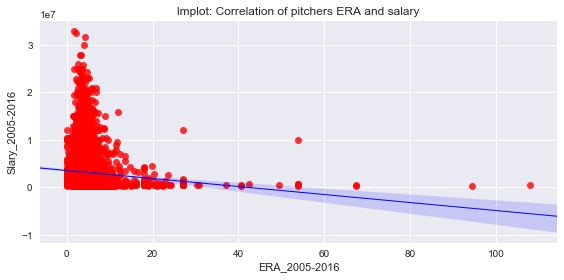

In [22]:
# lmplot() and regplot() functions perform in similar fashion, The main difference is that lmplot takes x and y 
# arguments only as a string. Whereas, regplot can take x and y arguments as a pandas series or a reference to 
# variables in a dataframe.

sns.lmplot(x='ERA',y='salary',data = pitching_df_clean,scatter_kws={'marker':'.', 'color': 'red'},
          line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)
plt.xlabel('ERA_2005-2016')
plt.ylabel('Slary_2005-2016')
plt.title('lmplot: Correlation of pitchers ERA and salary')
plt.show()

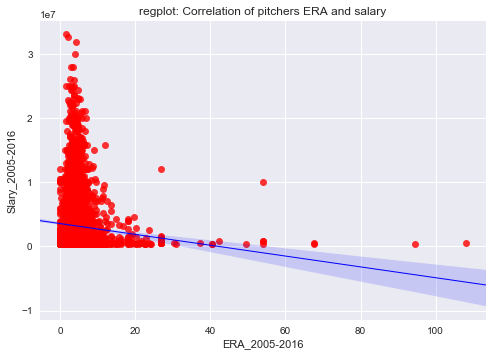

In [23]:
#regplot()
sns.regplot(x=pitching_df_clean['ERA'],y=pitching_df_clean['salary'],data=pitching_df_clean,
           scatter_kws={'marker':".", 'color': 'red'},line_kws={'linewidth':1,'color':'blue'})
plt.xlabel('ERA_2005-2016')
plt.ylabel('Slary_2005-2016')
plt.title('regplot: Correlation of pitchers ERA and salary')
plt.show()

### Conclusion: We have seen that we have no linear correlation between ERA and salary but I am not convinced with the result as most of the franchises do spend more on good pitchers. We cannot rule out correlation just by performing analysis in linear fashion. We may find correlation in non linear. I would like to take up the same analysis once I have enough knowledge on non linear regression. 

### Question 3:

### The main difference between National league and American league is that AL has a designated hitter instaed of a pitcher. The pitcher never appears at base. This rule was inducted in AL from 1973. I would like to identify the pitchers who played in both the leagues[NL,AL] and perform a z-test on thier ERA in both the leagues. I assume that the pitcher in AL performs better as he need not worry about batting. Let me confirm my assumption by performing a z-test.  

In [24]:
# As Designated hitter was introduced from 1973, we have to clean pitching_df dataframe to have records only from 1973.
pitching_dh_df =pitching_df[pitching_df['yearID']>=1973]
#print pitching_dh_df.head()

# Replcae the null values of ERA with the mean value of ERA:
pitching_dh_df.ERA = pitching_dh_df.ERA.fillna(pitching_dh_df.ERA.mean())
print pitching_dh_df.isnull().any()

playerID    False
yearID      False
stint       False
teamID      False
lgID        False
W           False
L           False
G           False
GS          False
CG          False
SHO         False
SV          False
IPouts      False
H           False
ER          False
HR          False
BB          False
SO          False
BAOpp        True
ERA         False
IBB         False
WP          False
HBP         False
BK          False
BFP         False
GF          False
R           False
SH           True
SF           True
GIDP         True
dtype: bool


All the null values in ERA are replaced with the mean.

In [26]:
# Creating a pandas series which conatins all the pitchers who played in AL from 1973.
player_AL = pitching_dh_df.playerID[pitching_dh_df['lgID'] == 'AL']
# Creating a pandas series which conatins all the pitchers who played in NL from 1973.
player_NL = pitching_dh_df.playerID[pitching_dh_df['lgID'] == 'NL']

In [29]:
# Removing duplicates from each sereis:
player_AL = player_AL.drop_duplicates()
player_NL = player_NL.drop_duplicates()

pitcher_played_both_leagues = []

# Review comment 05/15: Updated the code to use set intersection() instead of for loops. 
'''creating the list of players who played both the leagues:
for id in player_AL:
     if id in player_NL.values:
        pitcher_played_both_leagues.append(id)
len(pitcher_played_both_leagues)

# pitcher_played_both_leagues list contains all the players who played both leagues'''
pitcher_played_both_leagues = set(player_AL).intersection(player_NL)
len(pitcher_played_both_leagues)

1925

In [48]:
# The below snippet removes all the records of the players who played only one league. Looks small! But it took a while 
# to crack :p

for index,row in pitching_dh_df.iterrows():
    
    if(row['playerID'] not in pitcher_played_both_leagues):
        pitching_dh_df.drop(index,inplace = True)

### The abvoe snippet cleans the pitching_dh_df in a such a way that it contains only the reocrds of the players who played both the leagues.

In [31]:
pitching_dh_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
20316,acostcy01,1973,1,CHA,AL,10,6,48,0,0,...,3.0,2.0,7.0,1,396.0,42.0,30,NaN,NaN,NaN
20319,alexado01,1973,1,BAL,AL,12,8,29,26,10,...,5.0,3.0,7.0,0,726.0,2.0,85,NaN,NaN,NaN
20325,arlinst01,1973,1,SDN,NL,11,14,34,27,7,...,7.0,7.0,1.0,0,794.0,0.0,107,NaN,NaN,NaN
20326,bahnsst01,1973,1,CHA,AL,18,21,42,42,14,...,2.0,10.0,5.0,0,1218.0,0.0,128,NaN,NaN,NaN
20330,barbest01,1973,1,CAL,AL,3,2,50,1,0,...,3.0,4.0,3.0,0,386.0,19.0,40,NaN,NaN,NaN


In [ ]:
# 05/15: Commented out the below code as per the suggestions given by the reviewer. Created the required data frame in 
# one line using unstack() method.
'''# The below snippet finds the mean ERA of each player in each league
grp = pitching_dh_df.groupby(['playerID','lgID'],as_index = True)

print(len(grp.mean()['ERA']))
# fact check: We had 1925 players who played both the leagues. When we groupby the df on playerID and leagueID we should
# get 1925*2 = 3850 rows. Got it!

print 

s = grp.mean()['ERA']
# List which contains AL pitchers ERA mean:
AL_ERA = []
# List which contains NL pitchers ERA mean:
NL_ERA = []

for i in range(3850):
    if (i%2 == 0):
        AL_ERA.append(s.iloc[i])
    else:
        NL_ERA.append(s.iloc[i])

# Creating a DF to store the means accordingly:
era_df = pd.DataFrame({'AL':AL_ERA,
                       'NL':NL_ERA 
})

print era_df

# Each row of era_df contains the era_mean of that player in AL lg and NL lg as shown below'''

In [41]:
# The below snippet finds the mean ERA of each player in each league
grp = pitching_dh_df.groupby(['playerID','lgID'],as_index = True)

print(len(grp.mean()['ERA']))
# fact check: We had 1925 players who played both the leagues. When we groupby the df on playerID and leagueID we should
# get 1925*2 = 3850 rows. Got it!

print 

s = grp.mean()['ERA']

era_df = s.unstack(1)
print era_df.head()
# Thanks for introducing this amazing method! 

3850

lgID              AL     NL
playerID                   
aardsda01   5.382000  4.960
aasedo01    3.318182  4.455
abadfe01    3.690000  4.650
abbotji01   4.255000  6.910
abbotky01  12.415000  4.470


The era_df is bulit in such a way that each row contains the mean era of a player in AL league and mean era in NL league. For example, row 0 is for player acostcy01. His mean era in AL is 5.382000 and 4.960000 in NL.

In [47]:
# Dynamic Box plot of AL_ERA and NL_ERA:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='vemula.manoharr', api_key='ilelgrmD5N1SefQNL2mA')
trace0 = go.Box(
    y=era_df['AL'],
    name = 'AL',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y=era_df['NL'],
    name = 'NL',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = 'Box plot of AL and NL ERA',
    yaxis=dict(                 
        title="ERA"            
    ),
    
    )

box = [trace0,trace1]
figure = go.Figure(data=box, layout=layout)
py.iplot(figure)

From the above box plot we can understand that we have significant number of outliers. The plot also doesn't draw any kind of conclusion.Lets try to draw some sort of conlcusoin from the other plot below.

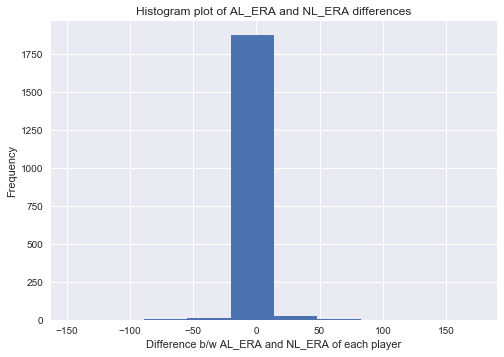

In [50]:
diff = map(lambda x,y: x-y,era_df['AL'],era_df['NL'])
plt.xlim([min(diff)-5, max(diff)+5])
plt.hist(diff)
plt.xlabel('Difference b/w AL_ERA and NL_ERA of each player')
plt.ylabel('Frequency')
plt.title('Histogram plot of AL_ERA and NL_ERA differences')
plt.show()

The above plot is the histogram plot of the ERA difference between AL and NL ERA of a pitcher. The bin around zero is having a frequency which is close to 1800. That implies that most of the pitchers had same performance in both the leagues. The bin which is around zero is more towards negative side of zero. That implies AL_ERA has more lesser values tham NL_ERA. It means that the pitcher performance in AL is better as his ERA was low comapred to his performance in NL. This is a kind of rough conclusion based on the above plot but let us conclude by performing some statistical test.

#### Looks like we have every thing to perform a z-test on AL_ERA and NL_ERA

 **Null Hypthoses: ** There would be no effect or reduction of ERA mean in NL case. The no effect or reduction of mean that we are talking is with respect to AL case. In other words, null hypthoses states that by introducing designated hitter the pitcher's ERA will not have any change. **H0 = μa >= μn.** μa is the mean era for AL pitchers and μn is the mean era for NL pitchers.

**Alternate Hypthoses:** The pitcher performance in AL would have an positive impact i.e his ERA will reduce as we have designated hitter in American league. In other words, alternate hypthoses states that by intorducing designated hitter the pitcher's ERA will reduce in AL. **H1 = μa < μn **.

I am performing z-test becasue the datset consists of all the players who represented in NL and AL. The z-test here is also dependent test as the experiment is done on the same sample with two different cases(NL and AL)

**Assumptions:** I would like to perform a z-test with 95% confidence interval. With α = 0.05 I would test if the pitcher's performance in AL yeilds a better ERA or not

The test here is one tailed test in negative direcction because, as per our hypotheses our point estimate is 0 and we are trying to test if the mean ERA in AL has decreased. So, the test would be One tailed test in positive direction.

In [28]:
mean_al = era_df.AL.mean()
print mean_al

6.01520095534


In [29]:
mean_nl = era_df.NL.mean()
print mean_nl

5.6121919427


α = 0.05, since the test is one tailed in positive direction z critical would be 1.64. 

In [30]:
std_al = era_df.AL.std(ddof=0)
zscore = (mean_al- mean_nl)/(std_al/(len(era_df.AL)**(0.5)))
print ("The z statistic is")
print zscore

The z statistic is
2.66609788882


### Conclusion: The calculated z statistic is greater than z critical so we can reject the null. The above analysis can be used in a debate if we can have a designated pitcher in national league or not. We can accept the alternate hypthoses i.e. the performance of the same pitcher is better in AL than his performance in NL. By using the z test results and analysis on the histogram plot we can argue that the same pitcher does better when they have designated hitter. The designated hitter debate is never ending in MLB. The debate can be found in the article http://m.mlb.com/news/article/162492422/designated-hitter-to-nl-debate-continues/ . The above test results add significant weight to the debate who argue to have a designated hitter.

### All the above questions were answered in such a way that we drew conclusions on the games that were completed. We do have very good prediction algorithms which can predict the winning squad , winning pitch etc.. There is a lot of scope in learning the prediction algorithms and apply those on the history of data to give positive insights to coaches, team managers or franchises. I am looking forward to learn those algorithms and take up this project again for prediction analysis.

### References:

https://plot.ly/python/getting-started/#start-plotting-online

http://www.numpy.org/

http://matplotlib.org/api/pyplot_api.html

http://pandas.pydata.org/pandas-docs/stable/groupby.html

http://m.mlb.com/news/article/162492422/designated-hitter-to-nl-debate-continues/